### Gradient Descent Example 1
Explained. Only 1 input feature.

In [1]:
import numpy as np

# Input data
x = np.array([1, 2, 3, 4])

# Target
y = np.array(0.5)

# Initial weights (input to output weights)
w = np.array([0.5, -0.5, 0.3, 0.1])

# ### Activation Function ###
# Activation function = f(h)
# Result of f(h) is y_hat (prediction from 0 to 1)
# Activation function is sometimes, and in this case, the sigmoid
# y_hat AKA neural network output: nn_output

# Defining the sigmoid activation function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# Derivative of the sigmoid function
def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

# the linear combination performed by the node (h in f(h) and f'(h)), AKA input to the output unit
h = np.dot(x, w)

# The neural network output (y_hat)
nn_output = sigmoid(h)

# Error of neural network (y - y_hat)
error = y - nn_output

# Output gradient (f'(h))
output_grad = sigmoid_prime(h)

# Error term (lowercase delta)
error_term = error * output_grad

# The learning rate, eta in the weight step equation
learnrate = 0.5

# Gradient descent step, AKA change in weights (uppercase delta of w)
del_w = learnrate * error_term * x


print('Neural Network output:')
print(nn_output)
print('Amount of Error:')
print(error)
print('Change in Weights:')
print(del_w)

Neural Network output:
0.6899744811276125
Amount of Error:
-0.1899744811276125
Change in Weights:
[-0.02031869 -0.04063738 -0.06095608 -0.08127477]


### Hidden Layer, forward pass only, Example 1

In [2]:
import numpy as np

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1/(1+np.exp(-x))

# Network size
N_input = 4
N_hidden = 3
N_output = 2

np.random.seed(42)
# Make some fake data
X = np.random.randn(4)

weights_input_to_hidden = np.random.normal(0, scale=0.1, size=(N_input, N_hidden))
weights_hidden_to_output = np.random.normal(0, scale=0.1, size=(N_hidden, N_output))


################
N_input = 3
N_hidden = 2
N_output = 1
X = np.array([[0.5, -0.2, 0.1]])
targets = np.array([[0.4]])
weights_input_to_hidden = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
weights_hidden_to_output = np.array([[0.3],
                       [-0.1]])
################



# ### TODO: Make a forward pass through the network ###
# dot of inputs(vector) and weights(matrix), result is vector
hidden_layer_in = np.dot(X, weights_input_to_hidden)
hidden_layer_out = sigmoid(hidden_layer_in)

print('Hidden-layer Output:')
print(hidden_layer_out)

# dot of hidden_out(vector) and weights(matrix), result is vector
output_layer_in = np.dot(hidden_layer_out, weights_hidden_to_output)
output_layer_out = sigmoid(output_layer_in)

print('Output-layer Output:')
print(output_layer_out)

Hidden-layer Output:
[[0.4850045  0.45512111]]
Output-layer Output:
[[0.5249765]]


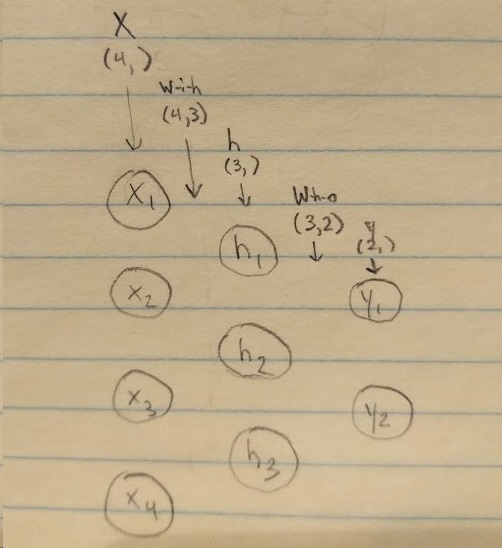

### Backpropagation Example

In [6]:
import numpy as np


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


x = np.array([0.5, 0.1, -0.2])
target = 0.6
learnrate = 0.5

weights_input_hidden = np.array([[0.5, -0.6],
                                 [0.1, -0.2],
                                 [0.1, 0.7]])

weights_hidden_output = np.array([0.1, -0.3])  # TODO maybe make (2,1)


################
x = np.array([[0.5, -0.2, 0.1]])
target = np.array([[0.4]])
weights_input_hidden = np.array([[0.1, -0.2],
                       [0.4, 0.5],
                       [-0.3, 0.2]])
weights_hidden_output = np.array([0.3, -0.1])
################


## Forward pass
hidden_layer_input = np.dot(x, weights_input_hidden)
hidden_layer_output = sigmoid(hidden_layer_input)
print('hidden_layer_output', hidden_layer_output, hidden_layer_output.shape)

output_layer_in = np.dot(hidden_layer_output, weights_hidden_output)
output = sigmoid(output_layer_in)
print('output', output)

## Backwards pass
## TODO: Calculate output error
error = target - output
print('error', error, error.shape)

# TODO: Calculate error term for output layer
output_gradient = output * (1-output)  # sigmoid prime
output_error_term = error * output_gradient
print('output_error_term', output_error_term, output_error_term.shape)

# TODO: Calculate error term for hidden layer
# equation = weights * output error * f'(h)
hidden_gradient = hidden_layer_output * (1 - hidden_layer_output)
print('hidden_gradient', hidden_gradient, hidden_gradient.shape)
hidden_error_term = weights_hidden_output * output_error_term * hidden_gradient
print('weights_hidden_output', weights_hidden_output, weights_hidden_output.shape)
print("hidden_error_term", hidden_error_term, hidden_error_term.shape)

# TODO: Calculate change in weights for hidden layer to output layer
# equation = learning rate * output error * f(h)
delta_w_h_o = learnrate * output_error_term * hidden_layer_output
print('delta_w_h_o', delta_w_h_o, delta_w_h_o.shape)

# TODO: Calculate change in weights for input layer to hidden layer
# equation = learning rate * hidden error * x_i
flipped_hidden_error = hidden_error_term[:,None].T  # from (2,) to (1,2)
maxtrix_x = x[:,None]  # from (3,) to (3,1)
delta_w_i_h = learnrate * maxtrix_x * flipped_hidden_error

print('Change in weights for hidden layer to output layer:')
print(delta_w_h_o)
print('Change in weights for input layer to hidden layer:')
print(delta_w_i_h)

hidden_layer_output [[0.4850045  0.45512111]] (1, 2)
output [0.5249765]
error [[-0.1249765]] (1, 1)
output_error_term [[-0.03116616]] (1, 1)
hidden_gradient [[0.24977513 0.24798589]] (1, 2)
weights_hidden_output [ 0.3 -0.1] (2,)
hidden_error_term [[-0.00233536  0.00077288]] (1, 2)
delta_w_h_o [[-0.00755786 -0.00709219]] (1, 2)
Change in weights for hidden layer to output layer:
[[-0.00755786 -0.00709219]]
Change in weights for input layer to hidden layer:
[[[-5.83839932e-04  2.33535973e-04 -1.16767986e-04]]

 [[ 1.93219209e-04 -7.72876837e-05  3.86438418e-05]]]


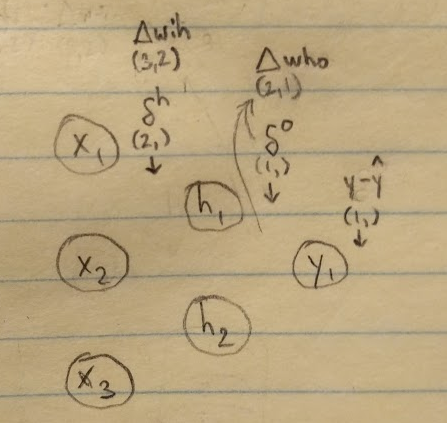

### Forward Pass & Backward Propagation
pasted quiz example:

In [ ]:
import numpy as np
from data_prep import features, targets, features_test, targets_test

np.random.seed(21)

def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))


# Hyperparameters
n_hidden = 2  # number of hidden units
epochs = 900
learnrate = 0.005

n_records, n_features = features.shape
last_loss = None
# Initialize weights
weights_input_hidden = np.random.normal(scale=1 / n_features ** .5,
                                        size=(n_features, n_hidden))
weights_hidden_output = np.random.normal(scale=1 / n_features ** .5,
                                         size=n_hidden)

for e in range(epochs):
    del_w_input_hidden = np.zeros(weights_input_hidden.shape)
    del_w_hidden_output = np.zeros(weights_hidden_output.shape)
    for x, y in zip(features.values, targets):
        ## Forward pass ##
        # TODO: Calculate the output
        hidden_input = np.dot(x, weights_input_hidden)
        hidden_output = sigmoid(hidden_input)
        out_layer_in = np.dot(hidden_output, weights_hidden_output)
        output = sigmoid(out_layer_in)
        # print('x:', x, x.shape)
        # print('weights_input_hidden:', weights_input_hidden, weights_input_hidden.shape)
        # print('hidden_input', hidden_input, hidden_input.shape)
        # print('hidden_output', hidden_output, hidden_output.shape)
        # print('weights_hidden_output', weights_hidden_output, weights_hidden_output.shape)
        # print('output', output, output.shape)

        ## Backward pass ##
        # TODO: Calculate the network's prediction error
        error = y - output

        # TODO: Calculate error term for the output unit
        output_error_term = error * output * (1 - output)
        # print('output_error_term', output_error_term, output_error_term.shape)

        ## propagate errors to hidden layer

        # TODO: Calculate the hidden layer's contribution to the error
        hidden_error = weights_hidden_output * output_error_term
        # print('hidden_error', hidden_error, hidden_error.shape)
        
        # TODO: Calculate the error term for the hidden layer
        hidden_error_term = hidden_error * hidden_output * (1 - hidden_output)
        # print('hidden_error_term', hidden_error_term, hidden_error_term.shape)
        
        # TODO: Update the change in weights
        del_w_hidden_output += output_error_term * hidden_output
        
        # change x (6,) to (6,1), hidden_error_term (2,) to (1,2)
        del_w_input_hidden += (x[:,None] *
                               hidden_error_term[:,None].T)
        # print('del_w_hidden_output', del_w_hidden_output, del_w_hidden_output.shape)
        # print('del_w_input_hidden', del_w_input_hidden, del_w_input_hidden.shape)
        
        # break #TEMP

    # TODO: Update weights
    weights_input_hidden += learnrate * del_w_input_hidden / n_records
    weights_hidden_output += learnrate * del_w_hidden_output / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        hidden_output = sigmoid(np.dot(x, weights_input_hidden))
        out = sigmoid(np.dot(hidden_output,
                             weights_hidden_output))
        loss = np.mean((out - targets) ** 2)

        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss

# Calculate accuracy on test data
hidden = sigmoid(np.dot(features_test, weights_input_hidden))
out = sigmoid(np.dot(hidden, weights_hidden_output))
predictions = out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))


### Gradient Descent Example 2
multiple input features

In [ ]:
import numpy as np
from data_prep import features, targets, features_test, targets_test


def sigmoid(x):
    """
    Calculate sigmoid
    """
    return 1 / (1 + np.exp(-x))

# TODO: We haven't provided the sigmoid_prime function like we did in
#       the previous lesson to encourage you to come up with a more
#       efficient solution. If you need a hint, check out the comments
#       in solution.py from the previous lecture.

# Use to same seed to make debugging easier
np.random.seed(42)

n_records, n_features = features.shape
last_loss = None

# Initialize weights
weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

# Neural Network hyperparameters
epochs = 1000
learnrate = 0.5

for e in range(epochs):
    del_w = np.zeros(weights.shape)
    for x, y in zip(features.values, targets):
        # Loop through all records, x is the input, y is the target

        # Note: We haven't included the h variable from the previous
        #       lesson. You can add it if you want, or you can calculate
        #       the h together with the output

        # TODO: Calculate the output
        output = sigmoid(np.dot(x, weights))
        output_gradient = output * (1-output)

        # TODO: Calculate the error
        error = y - output

        # TODO: Calculate the error term
        error_term = error * output_gradient

        # TODO: Calculate the change in weights for this sample
        #       and add it to the total weight change
        del_w += error_term * x

    # TODO: Update weights using the learning rate and the average change in weights
    weights += learnrate * del_w / n_records

    # Printing out the mean square error on the training set
    if e % (epochs / 10) == 0:
        out = sigmoid(np.dot(features, weights))
        loss = np.mean((out - targets) ** 2)
        if last_loss and last_loss < loss:
            print("Train loss: ", loss, "  WARNING - Loss Increasing")
        else:
            print("Train loss: ", loss)
        last_loss = loss


# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

#### data_prep.py for example 2

In [ ]:
# data_prep.py
import numpy as np
import pandas as pd

admissions = pd.read_csv('binary.csv')

# Make dummy variables for rank
data = pd.concat([admissions, pd.get_dummies(admissions['rank'], prefix='rank')], axis=1)
data = data.drop('rank', axis=1)

# Standarize features
for field in ['gre', 'gpa']:
    mean, std = data[field].mean(), data[field].std()
    data.loc[:,field] = (data[field]-mean)/std
    
# Split off random 10% of the data for testing
np.random.seed(42)
sample = np.random.choice(data.index, size=int(len(data)*0.9), replace=False)
data, test_data = data.ix[sample], data.drop(sample)

# Split into features and targets
features, targets = data.drop('admit', axis=1), data['admit']
features_test, targets_test = test_data.drop('admit', axis=1), test_data['admit']